a = 3.06056438499974e-05 u(a) = 8.970641307973306e-07
b = 0.013244897074861137 u(b) = 5.4946929123030634e-05


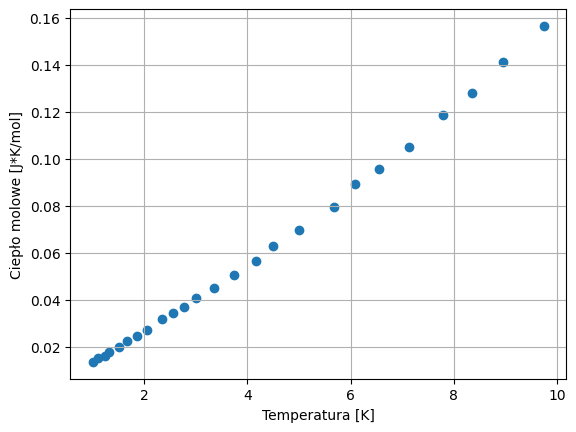

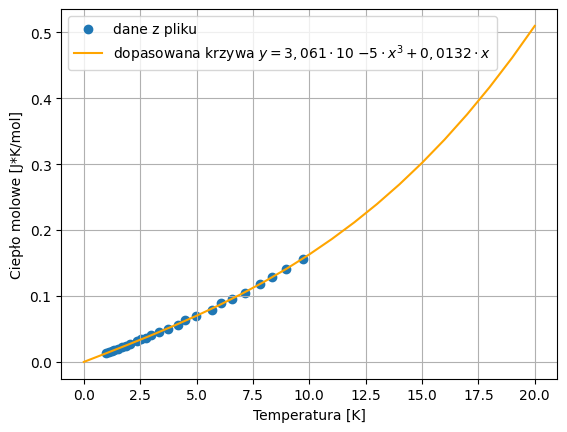

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Model krzywej do dopasowania 
def model(x, a, b):
    return a * x**3 + b * x

T, c_mass = np.loadtxt(r"Mn.dat", unpack=True) #wczytanie danych z temperaturą i ciepłem masowym
c_moll = 54.94* c_mass #przekształcenie na ciepło molowe

#plotowanie wykresu surowych danych
plt.figure()
plt.scatter(T, c_moll, label = 'dane z pliku')
plt.xlabel('Temperatura [K]')
plt.ylabel('Ciepło molowe [J*K/mol]')
plt.grid()

#fitting 
params, covariance = curve_fit(model, T, c_moll)
a, b = params
print("a =", a, 'u(a) =', covariance[0][0]**.5)
print("b =", b, 'u(b) =', covariance[1][1]**.5)

#plottowanie z dopasowaną krzywą
plt.figure()
plt.scatter(T, c_moll, label = 'dane z pliku')
plt.xlabel('Temperatura [K]')
plt.ylabel('Ciepło molowe [J*K/mol]')
plt.grid()
x_int = np.linspace(0, 20, 21)
fit = a* x_int**3 + b*x_int
plt.plot(x_int, fit, label = r'dopasowana krzywa $y=3,061 \cdot 10^ {-5} \cdot  x^3+0,0132 \cdot x$', color = 'orange')
plt.legend()
